# E2a: Küchentischversuch zum Laval-Rotor

Name: Adrian Gabel

Datum: 11.01.2024  

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

-Wie realistisch sind die errechneten Frequenzen der getesteten Proben?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="Image_3.jpeg" width="500">

- Beschreibung des Aufbaus: der Beschleunigungssensor wird mit Hilfe von starkem Klebeband fest an eine Ecke des Smartphones geklebt.
- Vorgangsbeschreibung: Die Vibration des Smartphones wird mit Hilfe einer App dauerhaft und bei gleichbleibender Frequenz aktiviert. Der Sensor befindet sich dabei an der Stelle mit der größten spürbaren Vibration.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft
path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240111_194136_AdrianGabel_Handy" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240111_194136_AdrianGabel_Handy.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240111_194136_AdrianGabel_Handy/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240111_194136_AdrianGabel_Handy/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240111_194136_AdrianGabel_Handy/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1ee847c5-6dd5-6ecf-aa58-0341b02a1b83": {
    "type": "probe",
    "name": "Handy",
    "comment": "",
    "path": "measurement_data/data_2024

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
path = path_measurement_folder+"/"+h5_file_name
f = h5py.File(path, "r")

#creating empty lists
x = []
y = []
z = []
timestamp = []

#adding values and timestamps to list
for i, UUID in enumerate(f["RawData"].keys()):
    x.append(list(f["RawData"][UUID]["acceleration_x"]))
    y.append(list(f["RawData"][UUID]["acceleration_y"]))
    z.append(list(f["RawData"][UUID]["acceleration_z"]))
    timestamp.append(list(f["RawData"][UUID]["timestamp"]))
#converting resulting lists to np arrays    
x = np.array(x[0])
y = np.array(y[0])
z = np.array(z[0])
timestamp = np.array(timestamp[0])


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:
#getting acceleration amount
vec_accel = get_vec_accel(x, y, z)

#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

No handles with labels found to put in legend.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


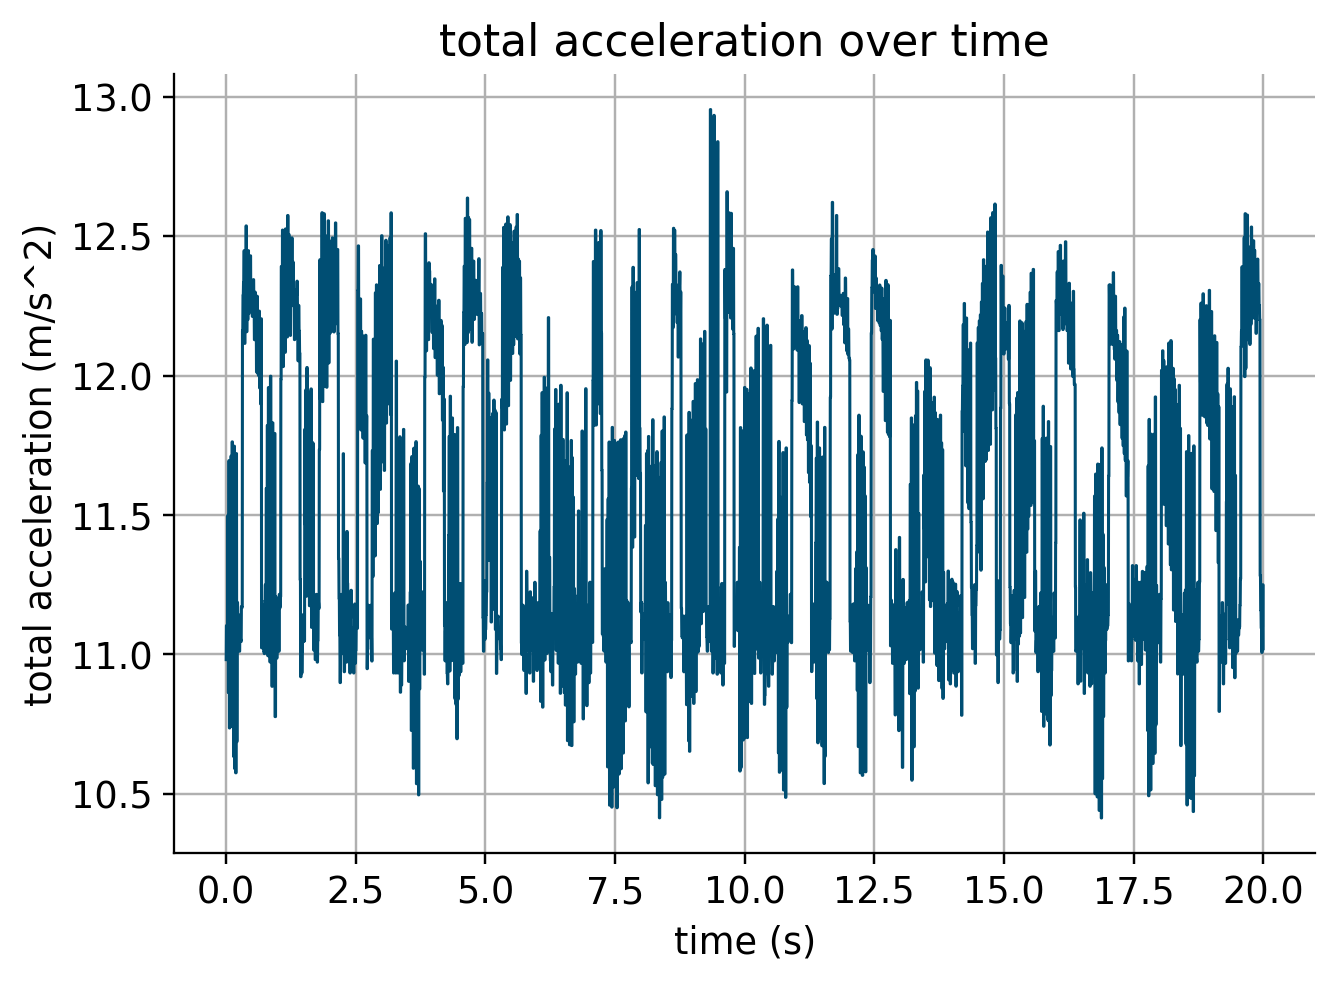

In [6]:
# plotting vec_accel
plt.plot(timestamp, vec_accel,'-', lw=1)

# creating the labels
plt.xlabel('time (s)')
plt.ylabel('total acceleration (m/s^2)')

# creating the title
plt.title('total acceleration over time')

# creating a legend
plt.legend()

# creating a grid to read the data easier 
plt.grid(True)

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [7]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.

#calling interpolation function to interpolate measurement data
(x_interp,y_interp) = interpolation(timestamp, vec_accel)
print(len(x_interp),len(timestamp))

9598 9598


#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

27


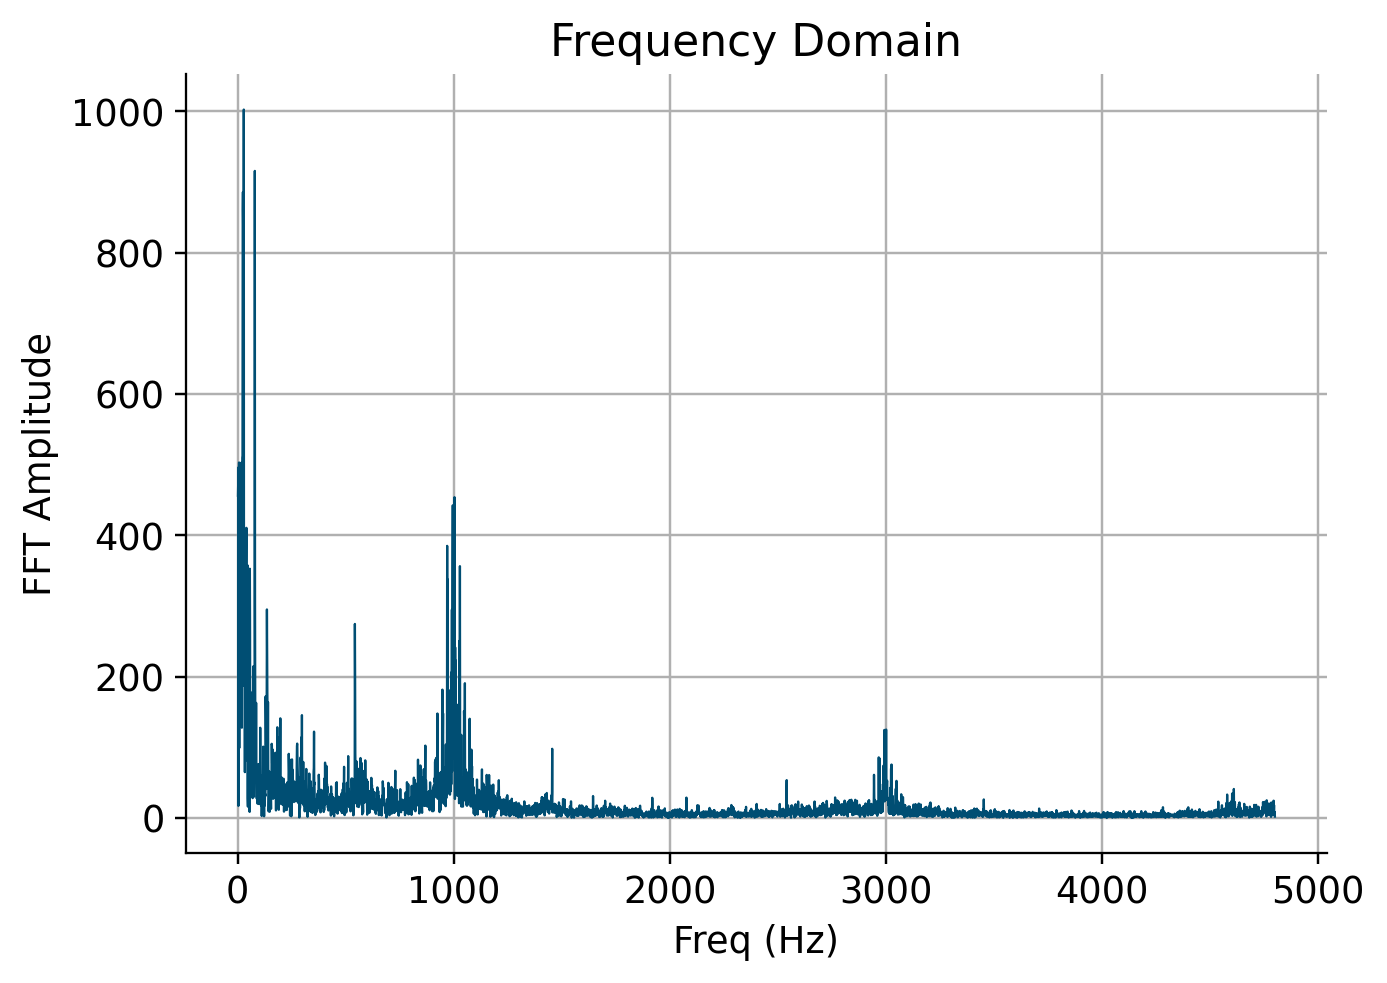

In [8]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#calling fft function
amp, freq = my_fft(y_interp,x_interp)

#plotting resulting fft amplitude and frequency 
plt.plot(freq, amp)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude')
# creating a grid to read the data easier 
plt.grid(True)

# creating the title
plt.title('Frequency Domain')

#calculating max frequency
max_value = max(amp)
X_abs_list = np.ndarray.tolist(amp)
max_freq = X_abs_list.index(max_value)
print(max_freq)

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="Image_1.jpeg" width="500">
<img src="Image_2.jpeg" width="500">

- Beschreibung des Aufbaus: der Sensor wurde mittig an einen PC-Lüfter angebracht 
- Vorgangsbeschreibung: ein PC-Lüfter wurde durch anbringen von Gewichen an eines der Rotorblätter aus dem Gleichgewicht gebracht und bei gleichbleibenden 949Hz betrieben.

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [9]:
path_measurement_folder = "measurement_data/data_20240112_130522_AdrianGabel_PC_Fan" 
h5_file_name = "data_20240112_130522_AdrianGabel_PC_Fan.h5"

"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))

{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240112_130522_AdrianGabel_PC_Fan/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240112_130522_AdrianGabel_PC_Fan/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240112_130522_AdrianGabel_PC_Fan/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeafc91-eac7-6f12-b569-80a89889242b": {
    "type": "probe",
    "name": "PC_Fan",
    "comment": "",
    "path": "measurement_data/data_

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [10]:
path = path_measurement_folder+"/"+h5_file_name
f = h5py.File(path, "r")

#creating empty lists
x = []
y = []
z = []
timestamp = []

#adding values and timestamps to list
for i, UUID in enumerate(f["RawData"].keys()):
    x.append(list(f["RawData"][UUID]["acceleration_x"]))
    y.append(list(f["RawData"][UUID]["acceleration_y"]))
    z.append(list(f["RawData"][UUID]["acceleration_z"]))
    timestamp.append(list(f["RawData"][UUID]["timestamp"]))
#converting resulting lists to np arrays    
x = np.array(x[0])
y = np.array(y[0])
z = np.array(z[0])
timestamp = np.array(timestamp[0])

#### 2. Betrag der Beschleunigung berechnen


In [11]:
#getting acceleration amount
vec_accel = get_vec_accel(x, y, z)

#### 3. Darstellung der Messdaten

No handles with labels found to put in legend.


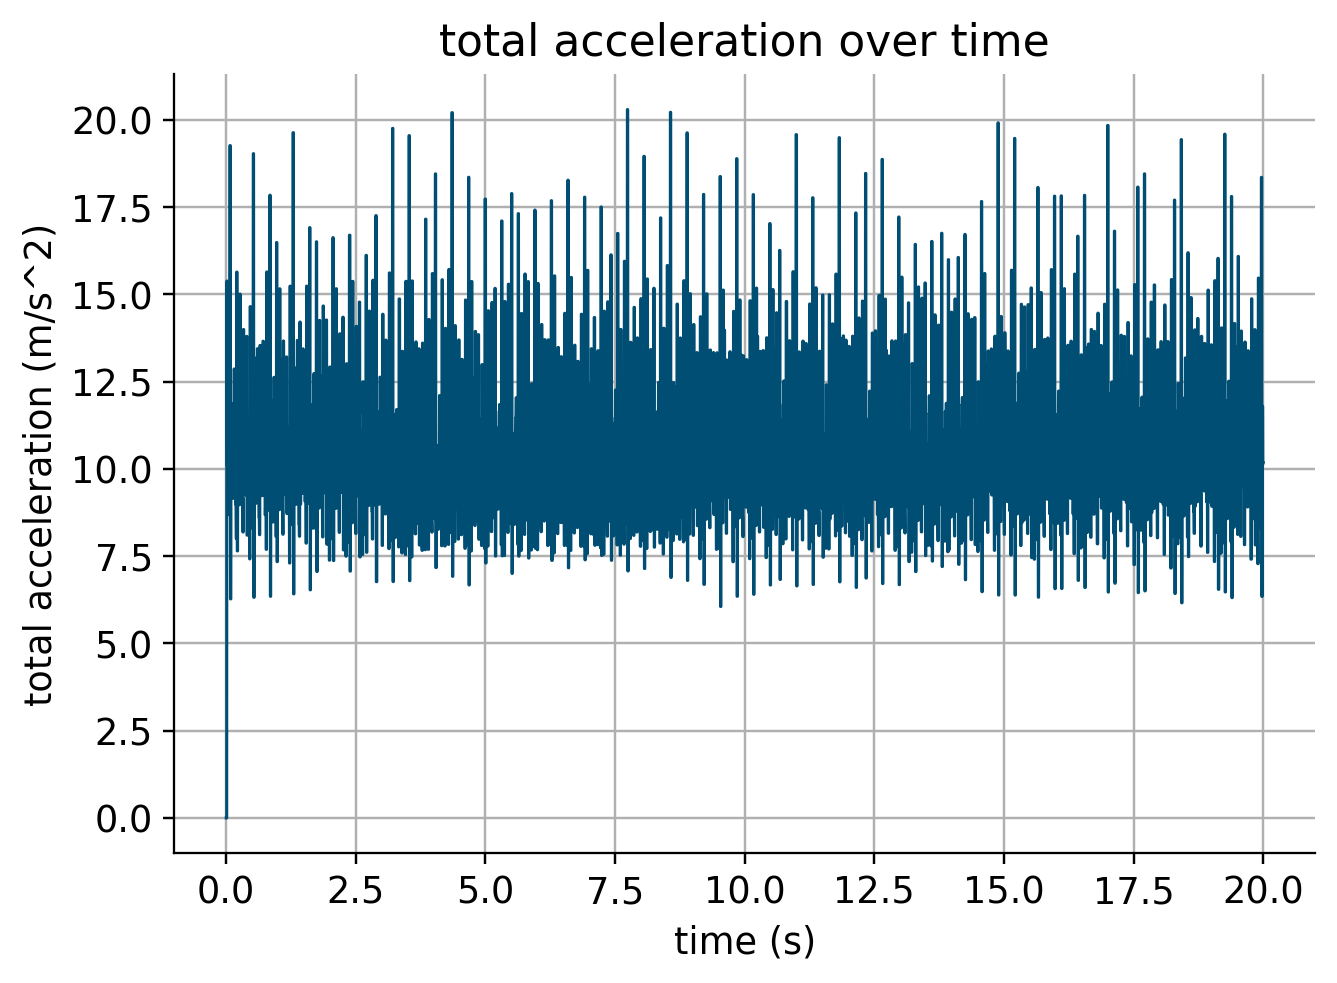

In [12]:
# plotting vec_accel
plt.plot(timestamp, vec_accel,'-', lw=1)

# creating the labels
plt.xlabel('time (s)')
plt.ylabel('total acceleration (m/s^2)')

# creating the title
plt.title('total acceleration over time')

# creating a legend
plt.legend()

# creating a grid to read the data easier 
plt.grid(True)

#### 4. Interpolation der Messwerte



In [13]:
#calling interpolation function to interpolate measurement data
(x_interp,y_interp) = interpolation(timestamp, vec_accel)
print(len(x_interp),len(timestamp))

7457 7457


#### 5 & 6. FFT durchführen und graphisch darstellen


626


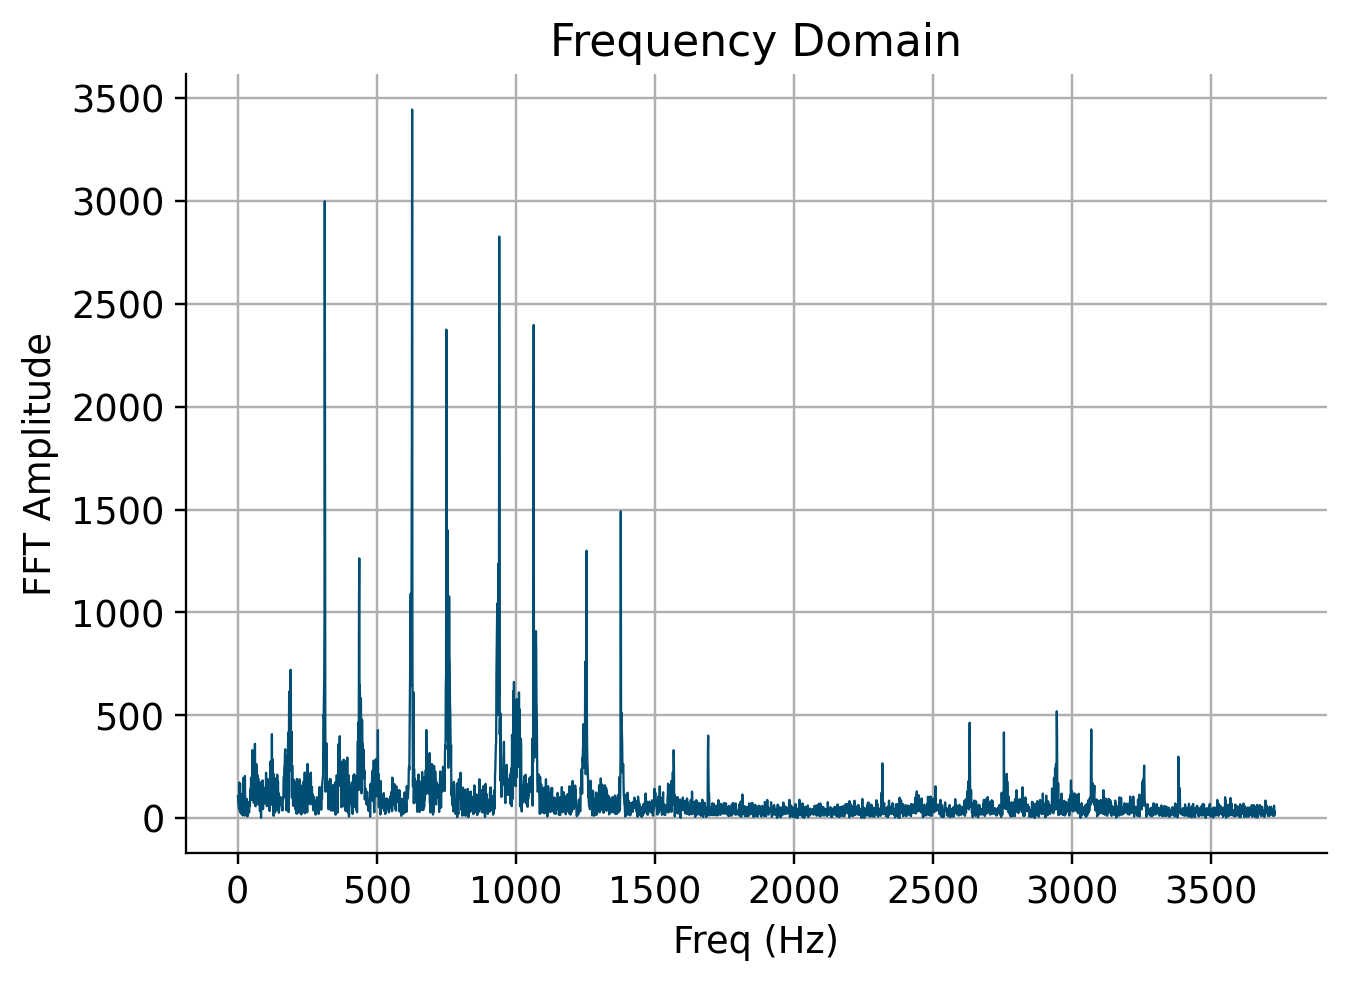

In [14]:
#calling fft function
amp, freq = my_fft(y_interp,x_interp)
#plotting resulting fft amplitude and frequency 
plt.plot(freq, amp)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude')
# creating a grid to read the data easier 
plt.grid(True)
# creating the title
plt.title('Frequency Domain')

#calculating max frequency
max_value = max(amp)
X_abs_list = np.ndarray.tolist(amp)
max_freq = X_abs_list.index(max_value)
print(max_freq)

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Die erwarteten Werte der Experimente und die tatsächlichen Messwerte stimmen gut überein.
Bei dem Handy lag der Erwartungswert bei 25-35Hz. Die Analyse ergab eine deutlichen Ausschlag bei 27Hz und ist somit exakt in der erwarteten Größenordung.

Bei dem vorherigen Versuch die Vibrationen einer Festplatte zu messen, musste ich feststellen, dass diese keine ausreichende Amplitude haben um einen korrekten Wert zu erfassen, daher habe ich stattdessen einen PC-Lüfter gemessen, welcher durch anbringen von Gewichten zum vibrieren gebracht wurde.

Der Lüfter hatte eine Frequenz von 949Hz und bei der Analyse kamen klare Hochpunkte um diese Frequenz raus, jedoch schaukelte sich der Tisch auf dem der Lüfter stand auf, was zu einer Maximalen Frequenz bei 626Hz führte.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Durch den Versuch habe ich viel zur praktischen Anwendung der Fouriertransformation gelernt. Auch zu Versuchaufbauten und Analyse von Messwerten habe ich viel dazugelernt. 